In [ ]:
# === Colab setup
!pip install --quiet xgboost lightgbm catboost optuna shap plotly scikit-learn optuna-integration[lightgbm] optuna-integration[xgboost] optuna-integration[sklearn]


from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os
DRIVE_DIR = '/content/drive/MyDrive/BigMart'
if not os.path.exists(DRIVE_DIR):
    os.makedirs(DRIVE_DIR, exist_ok=True)
print('Drive directory:', DRIVE_DIR)

In [1]:
import pandas as pd

train_df = pd.read_csv('Files/BigMart/train.csv')
test_df = pd.read_csv('Files/BigMart/test.csv')

def eda_report(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nInfo:")
    print(df.info())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nSample rows:\n", df.head())
    print("\nDescribe (numeric):\n", df.describe())
    print("\nDescribe (object):\n", df.describe(include=['O']))
    print("\nUnique values per column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    print("\nValue counts for categorical columns:")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\n{col} value counts:\n{df[col].value_counts().head(10)}")
    print("\n" + "-"*40 + "\n")

eda_report(train_df, "Train Data")
eda_report(test_df, "Test Data")

--- Train Data ---
Shape: (8523, 12)

Columns: ['Item_Identifier', ' Item_Weight', ' Item_Fat_Content', ' Item_Visibility', ' Item_Type            ', ' Item_MRP', ' Outlet_Identifier', ' Outlet_Establishment_Year', ' Outlet_Size', ' Outlet_Location_Type', ' Outlet_Type      ', ' Item_Outlet_Sales']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Identifier             8523 non-null   object 
 1    Item_Weight                8523 non-null   object 
 2    Item_Fat_Content           8523 non-null   object 
 3    Item_Visibility            8523 non-null   float64
 4    Item_Type                  8523 non-null   object 
 5    Item_MRP                   8523 non-null   float64
 6    Outlet_Identifier          8523 non-null   object 
 7    Outlet_Establishment_Year  8523 non-null   int64  
 8    Outlet_Siz


=== Plotting distributions for Train Data ===

Numeric columns: [' Item_Visibility', ' Item_MRP', ' Outlet_Establishment_Year', ' Item_Outlet_Sales']
Categorical columns: ['Item_Identifier', ' Item_Weight', ' Item_Fat_Content', ' Item_Type            ', ' Outlet_Identifier', ' Outlet_Size', ' Outlet_Location_Type', ' Outlet_Type      ']


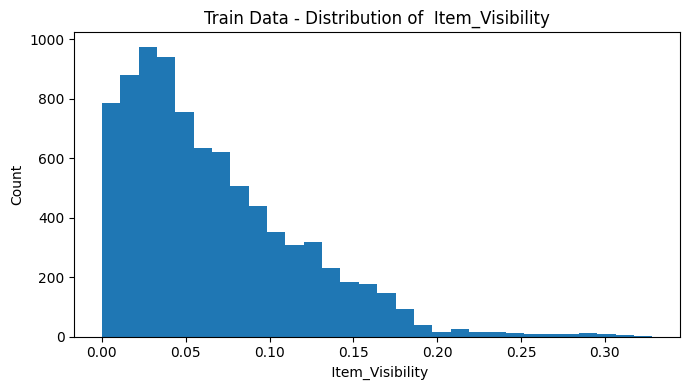

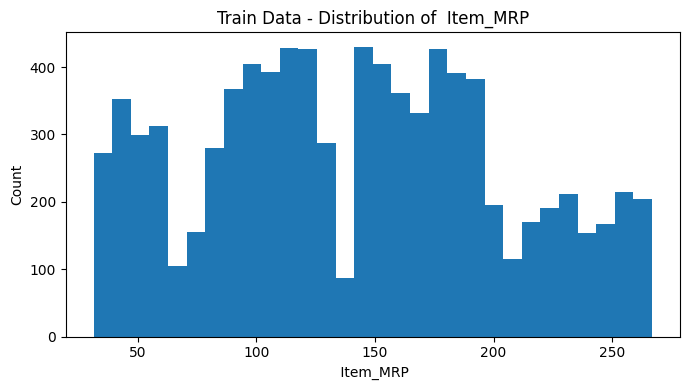

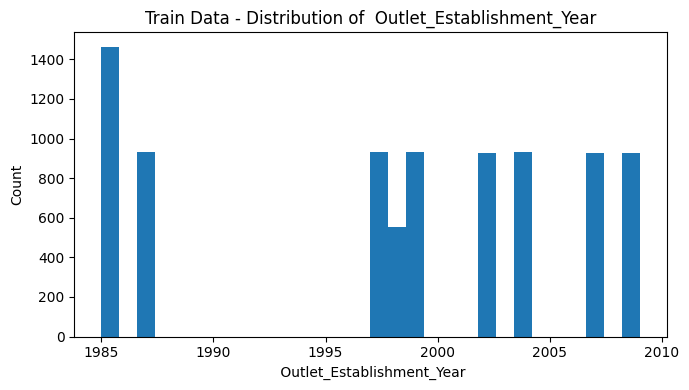

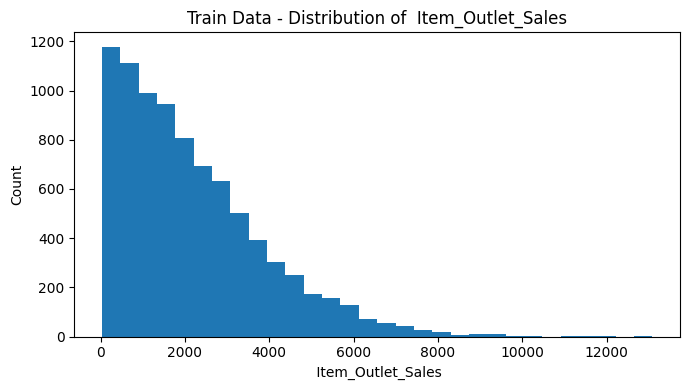

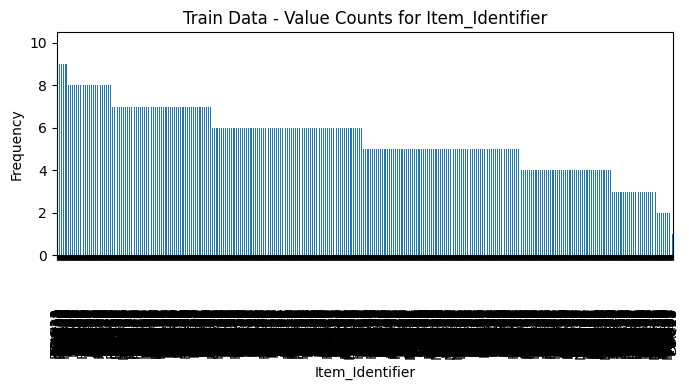

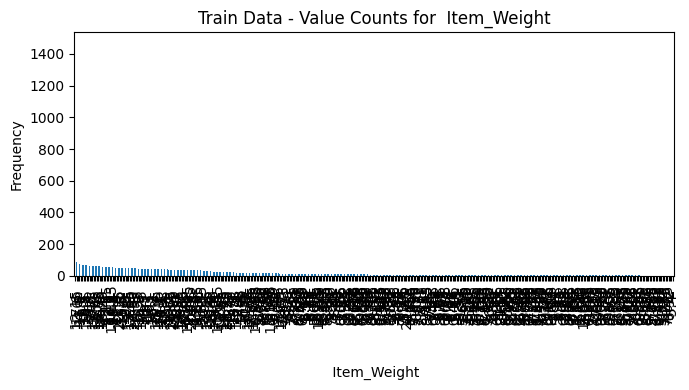

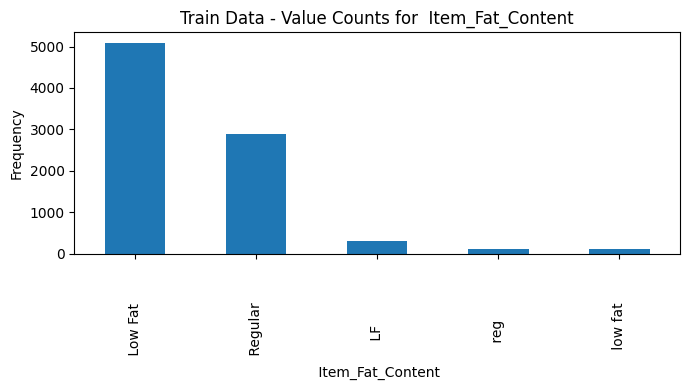

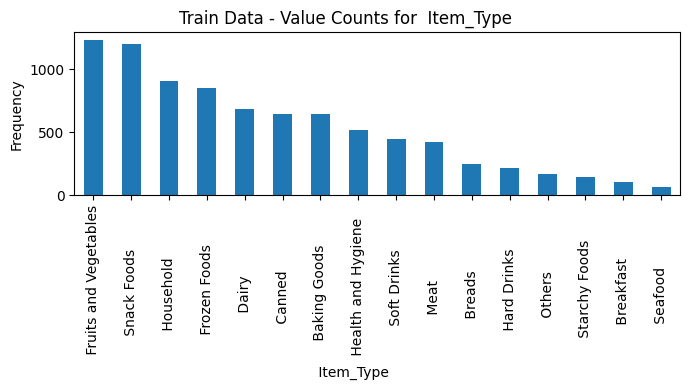

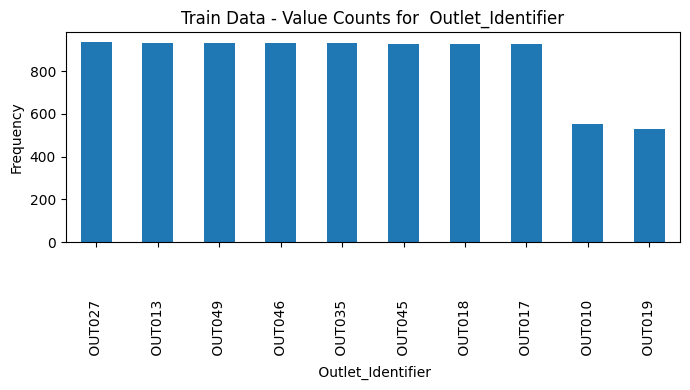

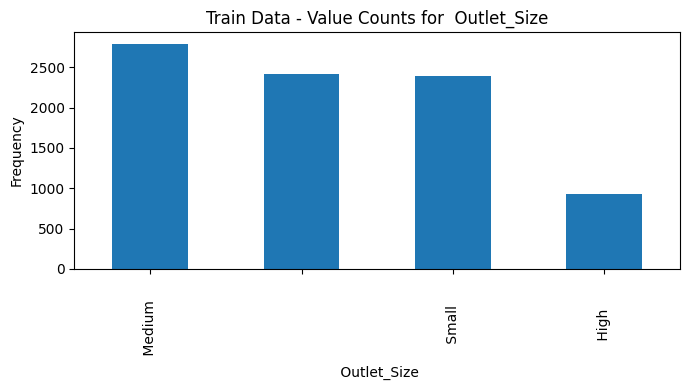

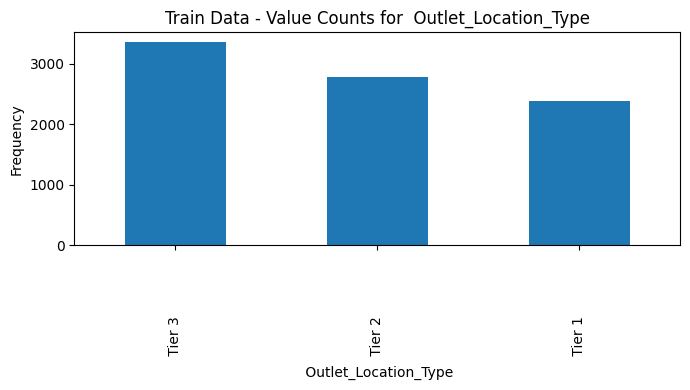

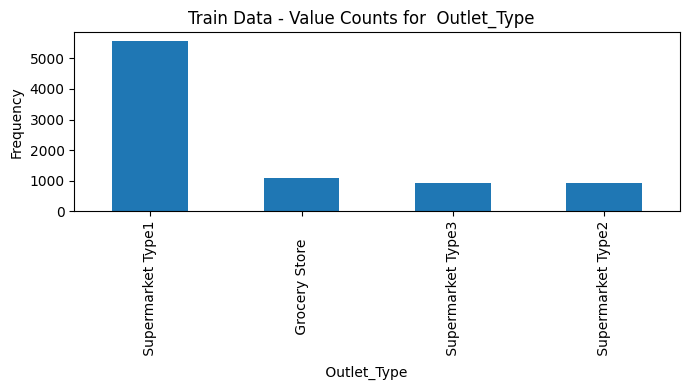


=== Plotting distributions for Test Data ===

Numeric columns: [' Item_Visibility', ' Item_MRP', ' Outlet_Establishment_Year']
Categorical columns: ['Item_Identifier', ' Item_Weight', ' Item_Fat_Content', ' Item_Type            ', ' Outlet_Identifier', ' Outlet_Size', ' Outlet_Location_Type', ' Outlet_Type']


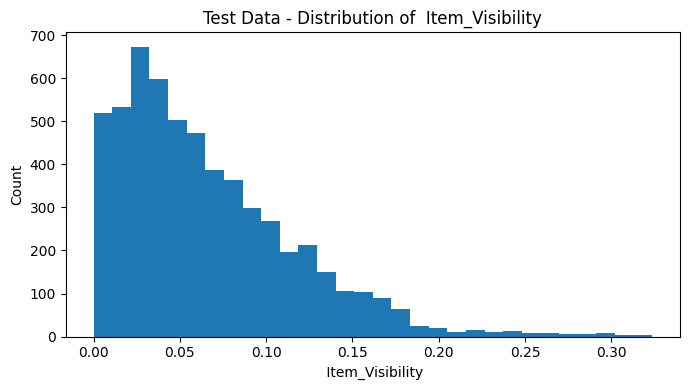

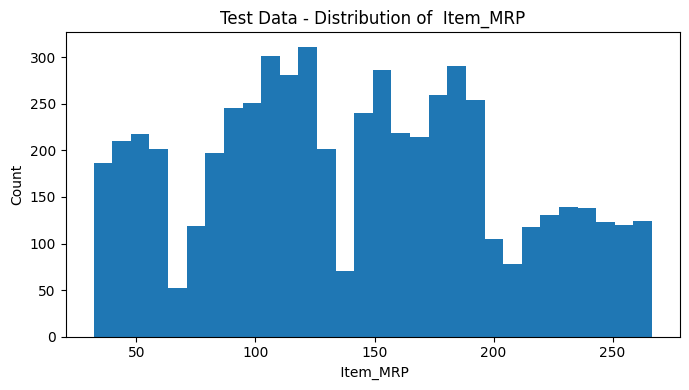

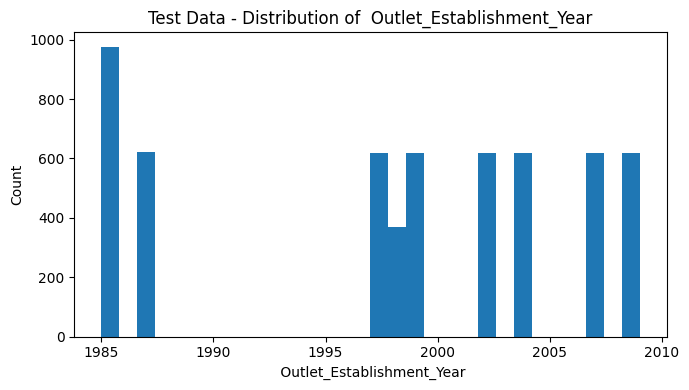

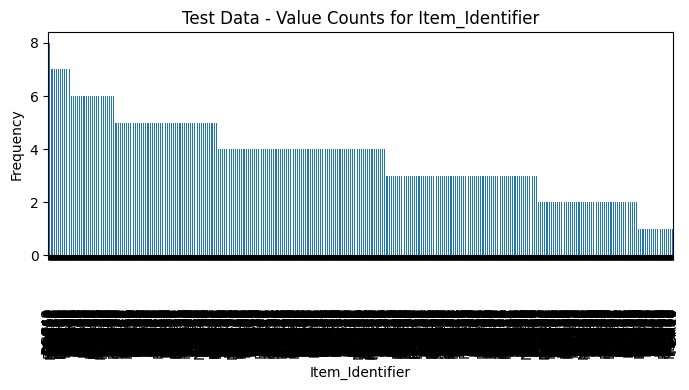

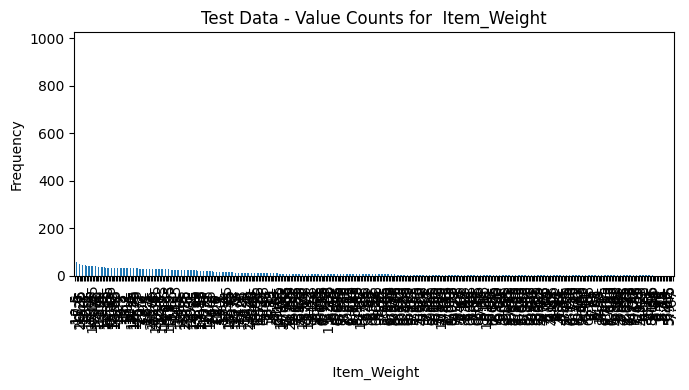

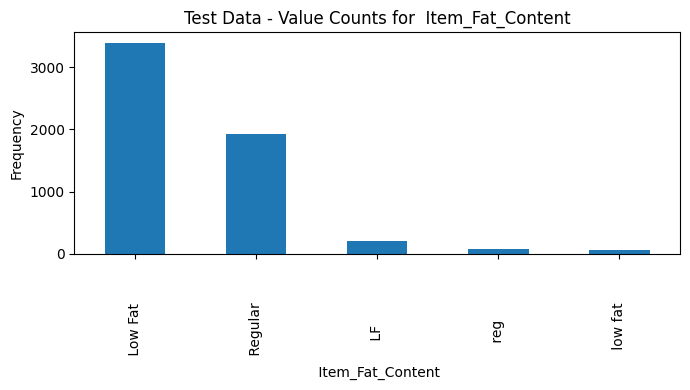

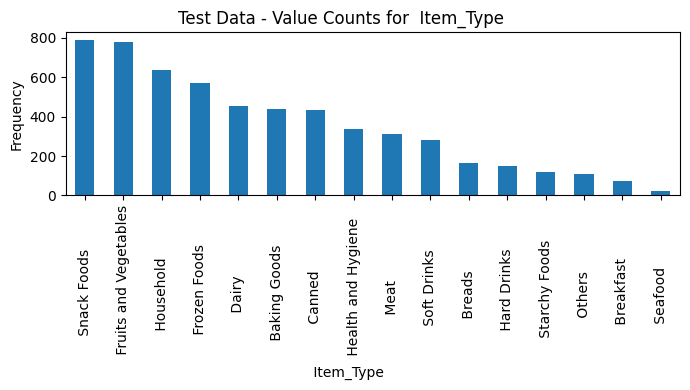

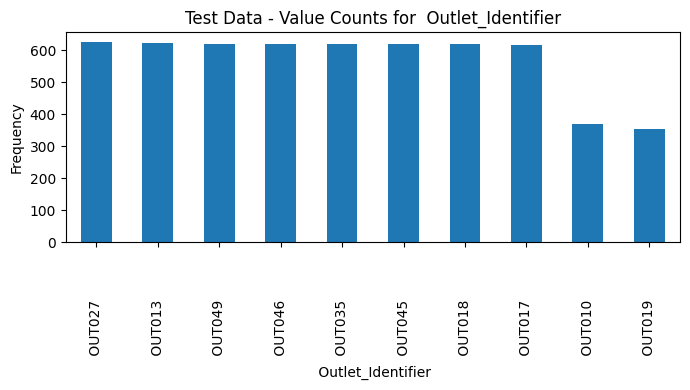

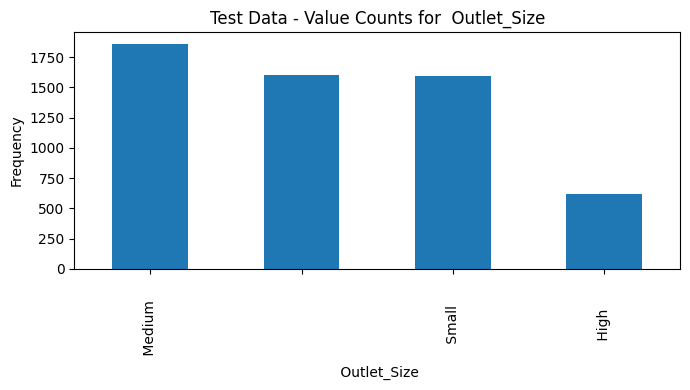

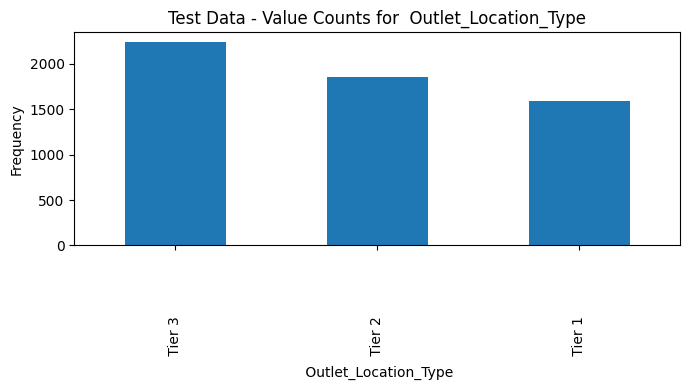

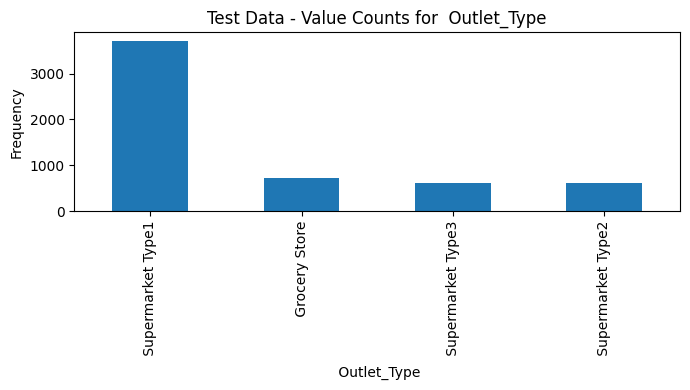

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distributions(df, name="Dataset"):
    print(f"\n=== Plotting distributions for {name} ===\n")

    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    print("Numeric columns:", list(numeric_cols))
    print("Categorical columns:", list(categorical_cols))

    # -------- Numeric Distribution Plots --------
    for col in numeric_cols:
        plt.figure(figsize=(7, 4))
        plt.hist(df[col].dropna(), bins=30)  # no color specified
        plt.title(f"{name} - Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    # -------- Categorical Plots --------
    for col in categorical_cols:
        plt.figure(figsize=(7, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"{name} - Value Counts for {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


# Run for both datasets
plot_distributions(train_df, "Train Data")
plot_distributions(test_df, "Test Data")
